In [ ]:
print("State/UT-wise Suicides by Farmers from 2017-2021")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv('/content/RS_Session_259_AU_204_1.csv')
data.shape


State/UT-wise Suicides by Farmers from 2017-2021


(37, 7)

In [ ]:
data

,Sl. No.,State/UT,2017 - Farmers - Cultivators,2018 - Farmers - Cultivators,2019 - Farmers - Cultivators,2020 - Farmers - Cultivators,2021 - Farmers -Cultivators
0,1,Andhra Pradesh,375.0,365.0,628.0,564,481
1,2,Arunachal Pradesh,0.0,0.0,0.0,1,0
2,3,Assam,3.0,5.0,26.0,12,153
3,4,Bihar,0.0,0.0,0.0,0,0
4,5,Chhattisgarh,285.0,182.0,233.0,227,71
5,6,Goa,0.0,0.0,0.0,0,0
6,7,Gujarat,4.0,21.0,3.0,5,0
7,8,Haryana,0.0,0.0,0.0,0,13
8,9,Himachal Pradesh,4.0,5.0,12.0,6,13
9,10,Jharkhand,0.0,0.0,0.0,0,0


<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 0 to 35
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Sl. No.                       36 non-null     object 
 1   State/UT                      36 non-null     object 
 2   2017 - Farmers - Cultivators  35 non-null     float64
 3   2018 - Farmers - Cultivators  35 non-null     float64
 4   2019 - Farmers - Cultivators  35 non-null     float64
 5   2020 - Farmers - Cultivators  36 non-null     int64  
 6   2021 - Farmers -Cultivators   36 non-null     int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 2.2+ KB


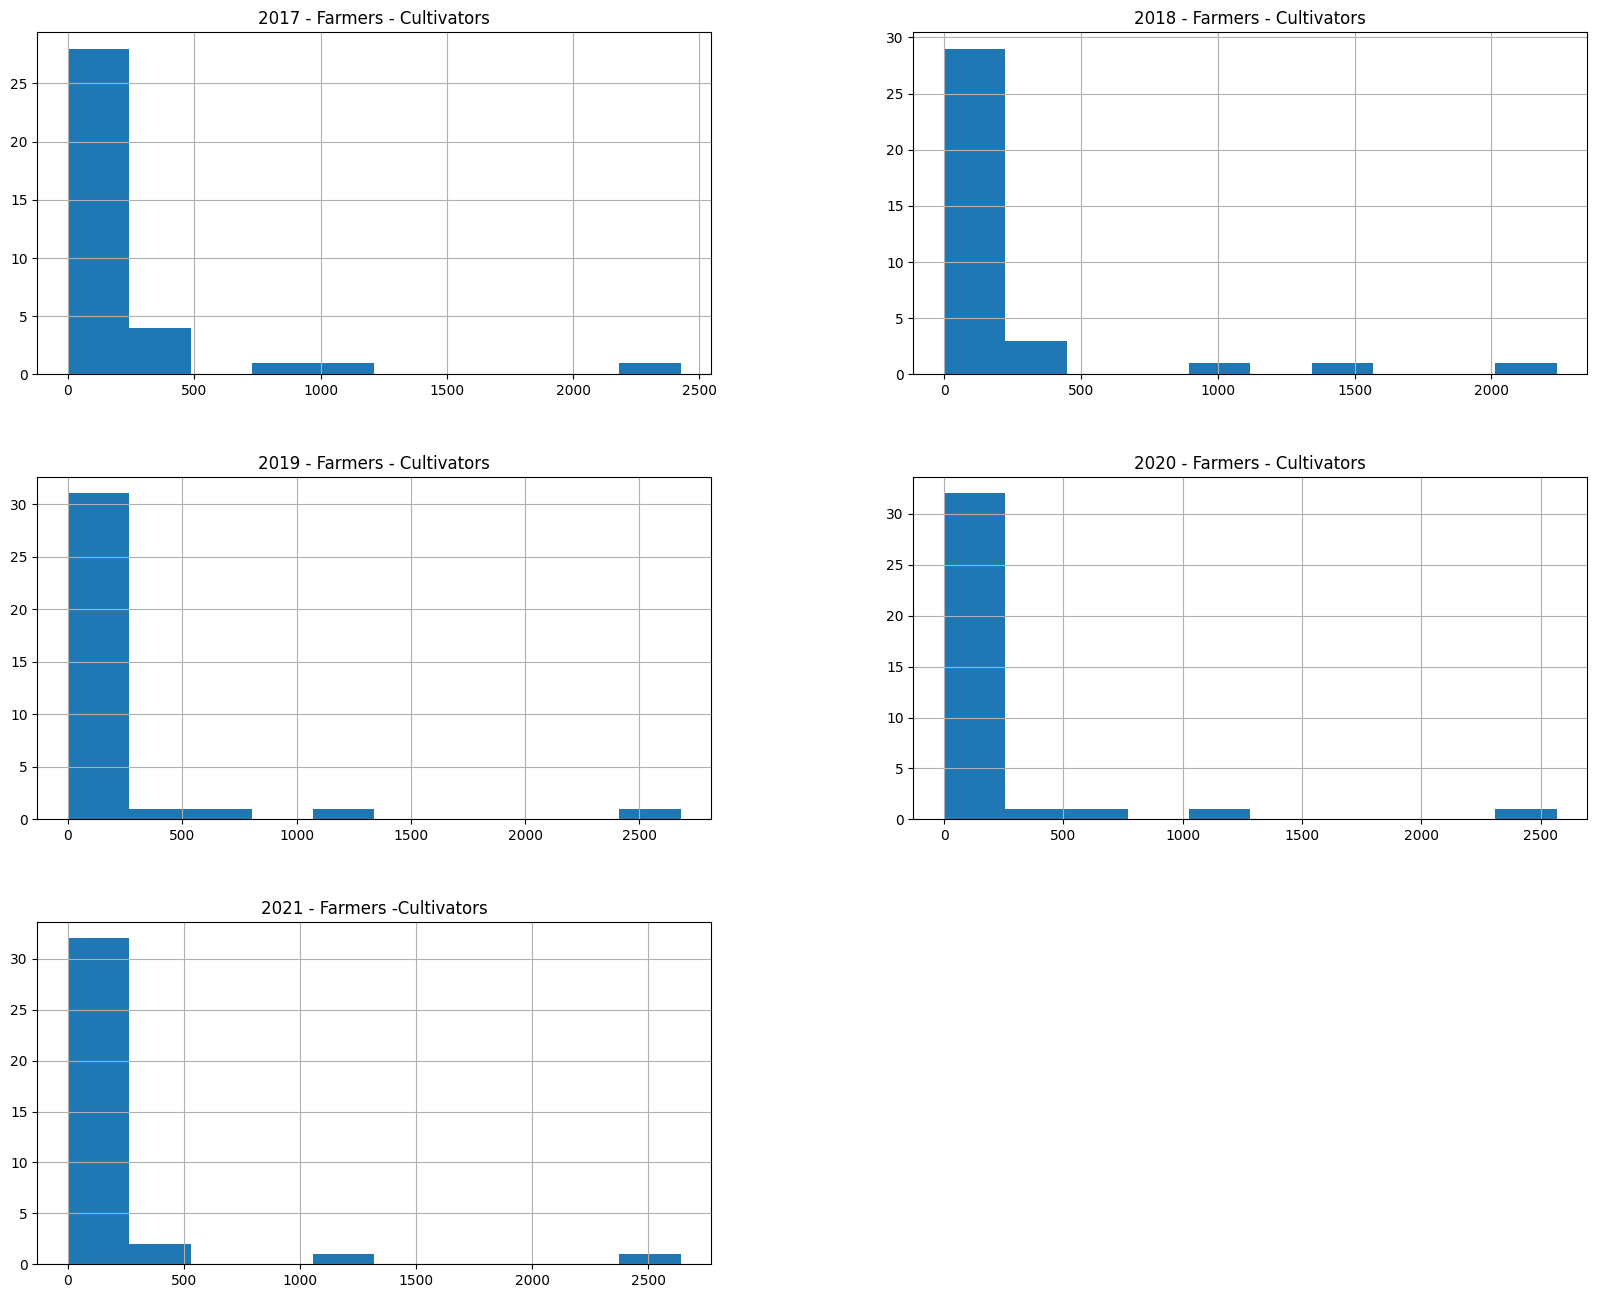

In [ ]:
data.info()
data.describe()
data.hist(figsize=(20,16))
data = data[data['State/UT'] != 'Total (All India)']

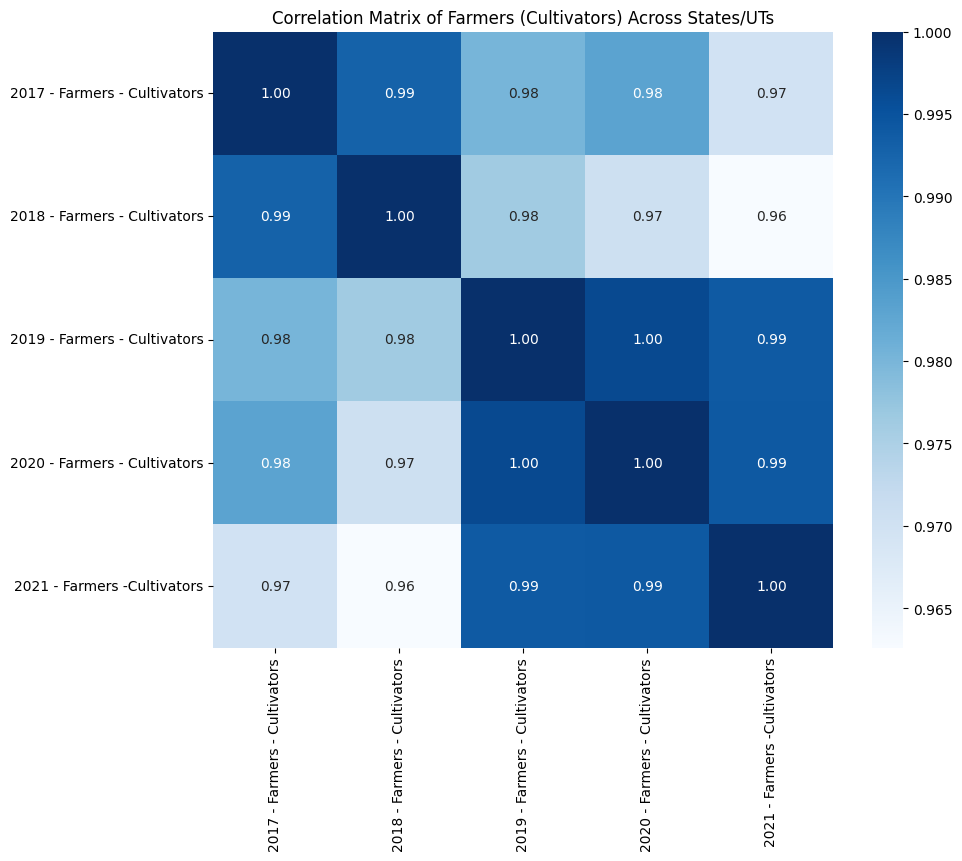

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = data[['2017 - Farmers - Cultivators',	'2018 - Farmers - Cultivators','2019 - Farmers - Cultivators','2020 - Farmers - Cultivators',	'2021 - Farmers -Cultivators']].corr()

plt.figure(figsize=(10, 8))
plt.title('Correlation Matrix of Farmers (Cultivators) Across States/UTs')
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import pandas as pd

# Impute missing values
imputer = SimpleImputer(strategy='mean')
x_imputed = imputer.fit_transform(data.drop(['State/UT'], axis=1))

scaler = StandardScaler()
x = scaler.fit_transform(x_imputed)
y = data['State/UT']
x = pd.DataFrame(x, columns=data.drop(['State/UT'], axis=1).columns)

x.head()
y.value_counts()

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
nb = GaussianNB()
nb.fit(x_train, y_train)
nb.score(x_train, y_train)
y_pred = nb.predict(x_test)
print(classification_report(y_test, y_pred))

                                          precision    recall  f1-score   support

                              Chandigarh       0.00      0.00      0.00       0.0
Dadra and Nagar Haveli and Daman and Diu       0.00      0.00      0.00       1.0
                                   Delhi       0.00      0.00      0.00       1.0
                       Jammu and Kashmir       0.00      0.00      0.00       0.0
                               Karnataka       0.00      0.00      0.00       0.0
                             Lakshadweep       0.00      0.00      0.00       0.0
                          Madhya Pradesh       0.00      0.00      0.00       1.0
                             Maharashtra       0.00      0.00      0.00       1.0
                               Meghalaya       0.00      0.00      0.00       0.0
                                 Mizoram       0.00      0.00      0.00       1.0
                              Puducherry       0.00      0.00      0.00       1.0
               

Accuracy =0.00%
raj


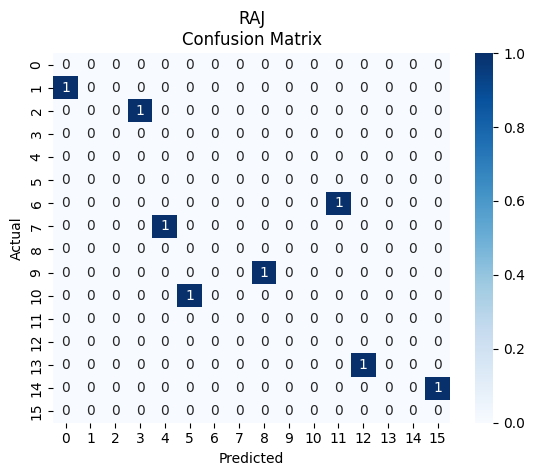

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc=accuracy_score(y_test,y_pred)*100

print("Accuracy ={:.2f}%".format(acc))
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')

plt.title('RAJ\nConfusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()